In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from IPython.display import Image, IFrame

import matplotlib as mpl
mpl.rcParams.update({'font.size': 10})

from lmfit.models import gaussian, lorentzian

%matplotlib nbagg

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Mark's old La$_2$CuO$_4$ spectra

In [8]:
IFrame('RIXScountRates.pdf', 600, 400)

$\pi-\sigma$ + $\pi-\pi$ spectra have 20 photons/s in the dd spectrum as of 2010
There have subsequently been a factor of 3$\times$3 improvements in the grating illumination and the detector leading to 180 photons/s 

## Relative throughput from Ignace

In [2]:
IFrame('SIX_vs_SLS_throughput.pdf', 600, 400)

## Load Cross Sections

In [3]:
CSs=np.load(open('cross_sections.npz','rb'))
eloss = CSs['eloss']
 
maxvals = {key:max(spec) for key, spec in CSs.items() if key is not 'eloss'}
print(maxvals)

{'eloss': 4.0, 'pi_pi_CS': 1771.5531069975509, 'pi_sigma_CS': 134.86144016948288, 'sigma_pi_CS': 159.08994804210889, 'sigma_sigma_CS': 2678.2983388990078}


In [4]:
def integrate(x, y, xmin, xmax):
    return np.sum(y[(x>xmin) & (x<=xmax)])

## Determine scaling factor

Get the strength of the dd excitation in the arbitrary units of the calculation.

In [5]:
for key, y in CSs.items():
    if key is not 'eloss':
        I = integrate(eloss, y, 1,3)
        print("{} itegral of dd is {:.3f}".format(key, I))
    
I = integrate(eloss, CSs['pi_pi_CS'], 1,3) + integrate(eloss, CSs['pi_pi_CS'], 1,3)
print("\npi_pi plus pi_sigma is {:.3f} \n".format(I))

factor = 180./I
print("scaling factor is {:.3f}".format(factor))

eloss itegral of dd is 800.200
pi_pi_CS itegral of dd is 2982.577
pi_sigma_CS itegral of dd is 193.411
sigma_pi_CS itegral of dd is 6631.555
sigma_sigma_CS itegral of dd is 5929.420

pi_pi plus pi_sigma is 5965.154 

scaling factor is 0.030


In [6]:
def key_to_label(key):
    return key.replace('_', ' ').replace('pi', '$\pi$').replace('sigma', '$\sigma$').replace('CS', '')

<IPython.core.display.Javascript object>


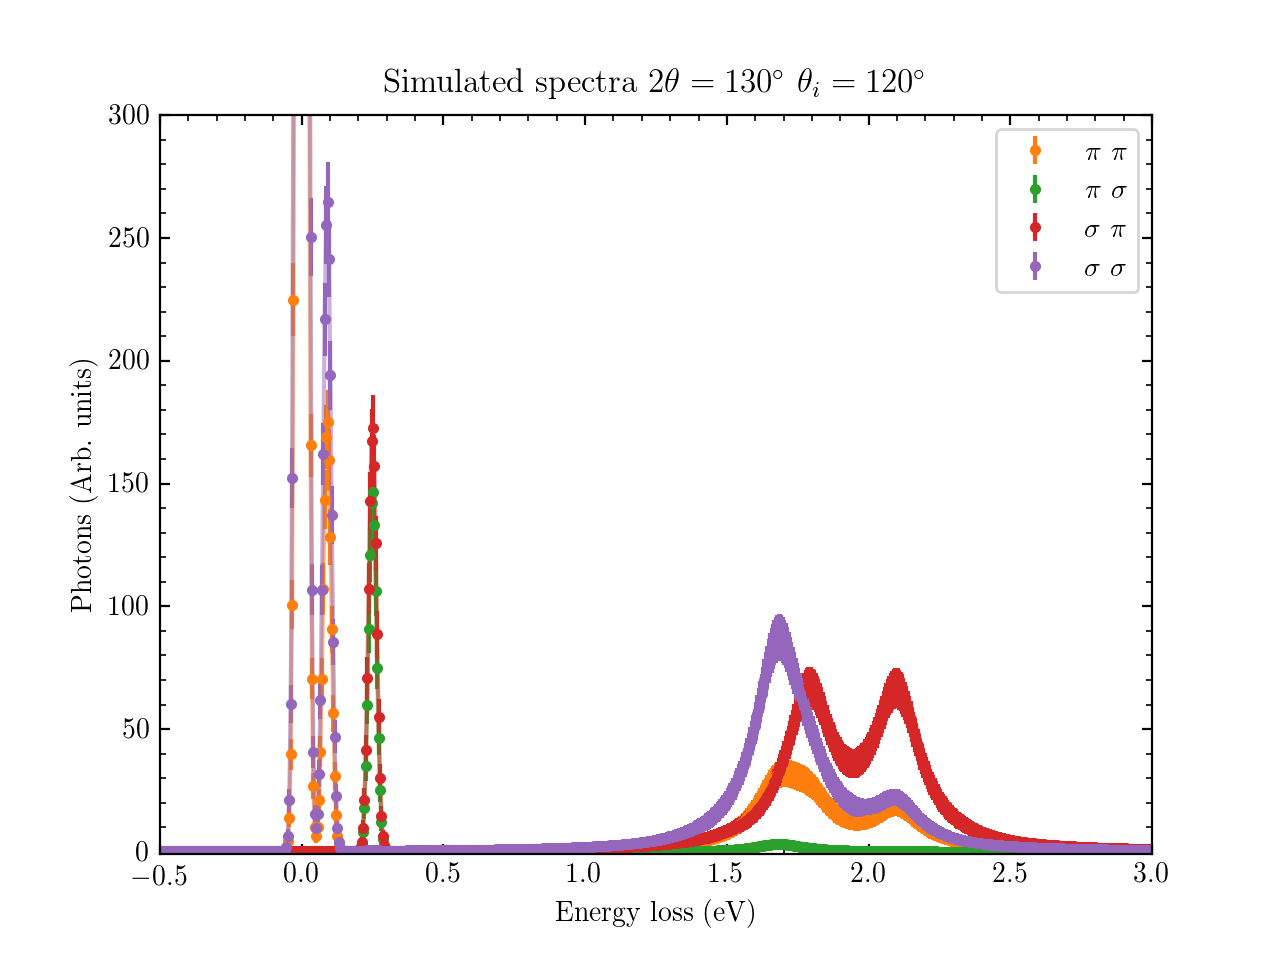

In [7]:
counting_time = 60*60 # in s
relative_throughput = 0.1 # throughput of beamline and spectrometer SIX vs. SAXES from above
polarimeter = 0.1         # throughput of polarimeter will be of order 10%

fig, ax = plt.subplots()

for (key, spectrum), color in zip(CSs.items(), colors):
    if key !='eloss':
        y = spectrum * factor * counting_time * relative_throughput * polarimeter
        errs = np.sqrt(y)
        errs[errs <1] = 1
        ax.plot(eloss, y, '-', color=color, alpha=0.5)
        ax.errorbar(eloss, y, errs, fmt='.', capsize=0, color=color, label=key_to_label(key))

ax.legend()
ax.set_xlabel('Energy loss (eV)')
ax.set_ylabel('Photons (Arb. units)')

ax.set_xlim([-0.5, 3])
ax.set_ylim([-1, 300])
ax.set_title(r'Simulated spectra $2\theta = 130^{\circ}$ $\theta_i  = 120^{\circ}$')